In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [3]:
pf_data.head()

,WMT,FB,BP
Date,,,
2013-12-31,65.850021,54.650002,29.942858
2014-01-02,66.034119,54.709999,29.554787
2014-01-03,65.816544,54.560001,29.487030
2014-01-06,65.448357,57.200001,29.567106
2014-01-07,65.649162,57.919998,29.905888


In [4]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2021-11-04,151.279999,335.850006,27.309999
2021-11-05,150.229996,341.130005,27.850000
2021-11-08,149.270004,338.619995,28.020000
2021-11-09,149.789993,335.369995,28.200001
2021-11-10,149.139999,330.600006,27.598600


<AxesSubplot:xlabel='Date'>

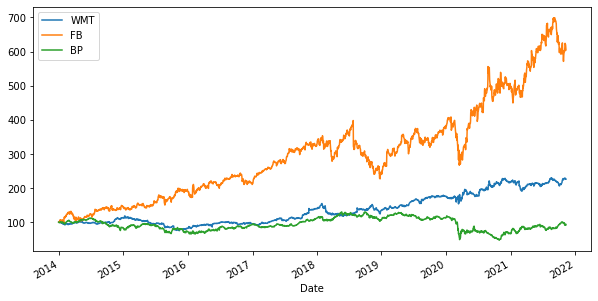

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

WMT    0.103220
FB     0.227268
BP    -0.010294
dtype: float64

In [8]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.041423,0.014931,0.010392
FB,0.014931,0.102480,0.026433
BP,0.010392,0.026433,0.098993


In [9]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.229172,0.162279
FB,0.229172,1.000000,0.262438
BP,0.162279,0.262438,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

3

In [12]:
arr = np.random.random(2)
arr

array([0.46712467, 0.03822721])

In [13]:
arr[0] + arr[1]

0.5053518842377075

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.0974764 , 0.17071037, 0.73181323])

In [15]:
weights[0] + weights[1] + weights[2]

0.9999999999999999

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.04132546847662189

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.06497992598696521

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2549116042610952

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10378876225522732,
  0.12369079345231034,
  0.06011733275332791,
  0.11358139646466044,
  0.15944324447290312,
  0.10925426949063644,
  0.14062312651016953,
  0.08388319720276785,
  0.1695665988088701,
  0.15505435786603072,
  0.10833005857093526,
  0.15438240883570944,
  0.0930870073226758,
  0.16406938354227663,
  0.10789473672478303,
  0.13286416243454074,
  0.09087051723357785,
  0.11315644188181594,
  0.1324287654248676,
  0.06391587838678302,
  0.10792226938498427,
  0.10671916727173934,
  0.10274038369793495,
  0.07187610729833682,
  0.13817155596906058,
  0.12917092313894127,
  0.1053772797840587,
  0.122020002093797,
  0.05709769406372558,
  0.07102954942242808,
  0.15717356243432612,
  0.16456109080178144,
  0.15398142569923076,
  0.08264131070381975,
  0.12898829033659576,
  0.12078808256237518,
  0.028871439279193577,
  0.12819367440953916,
  0.12197476350716083,
  0.07861226474341901,
  0.172204383893094,
  0.05476248142394569,
  0.1274497109512601,
  0.106557631826510

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.14897836,  0.09210158,  0.11428675,  0.10895247,  0.1275792 ,
         0.07654354,  0.05857401,  0.11405843,  0.04735992,  0.14954451,
         0.0972167 ,  0.1517747 ,  0.07202456,  0.03726426,  0.10272128,
         0.0895089 ,  0.10851496,  0.11935836,  0.05640548,  0.07148855,
         0.13902261,  0.10490056,  0.13408338,  0.1147916 ,  0.0814445 ,
         0.09621095,  0.09005236,  0.07536721,  0.15603699,  0.11235039,
         0.12107951,  0.13580525,  0.11561151,  0.17325033,  0.13479512,
         0.12654267,  0.11996279,  0.07884277,  0.10540499,  0.08899661,
         0.09914658,  0.08306363,  0.1659768 ,  0.15385092,  0.07179175,
         0.08543478,  0.10261415,  0.14568198,  0.08254057,  0.1699259 ,
         0.06290731,  0.11290597,  0.07527192,  0.11247629,  0.1736868 ,
         0.07872227,  0.13476708,  0.10404932,  0.10998294,  0.09987291,
         0.15202709,  0.11718865,  0.11915332,  0.10868476,  0.0844436 ,
         0.10700685,  0.15032909,  0.08892229,  0.1

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.148978,0.213686
1,0.092102,0.185998
2,0.114287,0.213854
3,0.108952,0.205426
4,0.127579,0.186592


In [23]:
portfolios.tail()

,Return,Volatility
995,0.093414,0.176460
996,0.109264,0.244112
997,-0.005432,0.308540
998,0.161601,0.208098
999,0.052062,0.239197


Text(0, 0.5, 'Expected Return')

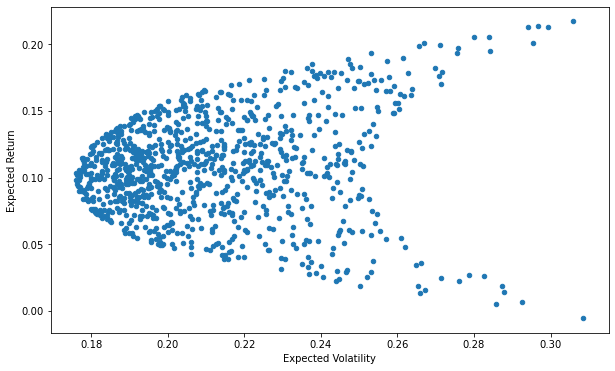

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')